# Python 机器学习实战 ——代码样例

# 第十七章 支持向量机

## 使用支持向量机分类图片

Digits 数据集主要由 8乘以8 大小的阿拉伯数字图片构成，数据集包含 1797 个样本，分为 0-9 十种不同的数字，数据集的样本图片如下图所示：

![Digits 数据集](./imgs/digits 数据集.png)

在分类过程中首先读取数据集，并将其随机分割成 80%的训练集和 20%的测试集，然后在训练集上采用高斯核函数的 SVM分类器，并在验证集上测试准确率，最后输出混淆矩阵和分类报告。

E:\Software\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


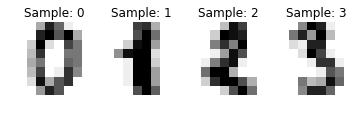

In [2]:
# 将matplotlib的图表直接嵌入到Notebook之中。
%matplotlib inline  

# 导入相关的包。

from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn import cross_validation
from sklearn import metrics
from matplotlib import pyplot as plt
import random

# 载入样本数据集。

digits = load_digits()

# 获取数据集图片及对应的标签。

images = digits.images
labels = digits.target

# 绘制样本图片。

for index, (image, label) in enumerate(zip(images[:4], labels[:4])):
    plt.subplot(1, 4, index + 1)
    plt.axis('off')
    plt.imshow(image,cmap=plt.cm.gray_r,interpolation='nearest')
    plt.title('Sample: %i' % label)



In [6]:
# 转换图片为向量。

n_samples = len(images)
image_vectors = images.reshape((n_samples, -1))

# 分割训练集与测试集。

sample_index = list(range(n_samples))
test_size = int(n_samples * 0.2)
random.shuffle(sample_index)
train_index, test_index = sample_index[test_size:], sample_index[:test_size]
X_train, Y_train = image_vectors[train_index],labels[train_index]
X_test, Y_test = image_vectors[test_index],labels[test_index] 

# 构建 SVC 分类器训练并预报，使用 rbf 核函数。

classifier = SVC(kernel='rbf', C=1.0, gamma=0.001)   
classifier.fit(X_train, Y_train)
prediction = classifier.predict(X_test)

# 输出结果及混淆矩阵。

print("分类报告： %s:\n%s\n" % 
      (classifier,metrics.classification_report(Y_test,prediction)))
print("混淆矩阵:\n%s" % metrics.confusion_matrix(Y_test, prediction))


分类报告： SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False):
             precision    recall  f1-score   support

          0       1.00      1.00      1.00        40
          1       1.00      1.00      1.00        32
          2       1.00      1.00      1.00        37
          3       0.97      1.00      0.98        30
          4       1.00      1.00      1.00        25
          5       1.00      1.00      1.00        36
          6       1.00      1.00      1.00        45
          7       1.00      0.98      0.99        45
          8       1.00      1.00      1.00        39
          9       0.97      0.97      0.97        30

avg / total       0.99      0.99      0.99       359


混淆矩阵:
[[40  0  0  0  0  0  0  0  0  0]
 [ 0 32  0  0  0  0  0  0  0  0]
 [ 0  0 37  0  0  0  0  0  0  0]
 [ 0  0  0 30  0  0  0  